# Practical Session - Text Mining - Python
October 2023




## Team members

- Mohammed ROUABAH
- William MAILLARD

## utilities function

This section defines some usefull functions used throughout this notebook.

In [1]:
# _. Progress bar
from tqdm import tqdm

In [2]:
from datetime import timedelta

def convert_time_from_ns_to_s(t: float) -> float:
    """
    Convert time from nanoseconds to seconds

    Parameters:
    -----------
    t: float
        time in nanoseconds

    Returns:
    --------
    t: float
        time in seconds
    """
    return t / 1e9

def convert_time_from_ns_to_ms(t: float) -> float:
    """
        Convert time from nanoseconds to milliseconds

        Parameters:
        -----------
            t: float
                time in nanaseconds

        Returns:
        --------
            t: float
                time in milliseconds
    """
    return t * 1e-3


def print_time(t: float) -> None:
    """
        Print the time in the following format:
        HH:MM:SS

        Parameters:
        -----------
            t: float
                time in nanaseconds
    """
    t_in_ms = convert_time_from_ns_to_ms(t)
    print("time (HH:MM:SS) ", end="")
    print(timedelta(microseconds=t_in_ms, ))



## 3 Download the corpus

This section simply import and download the reuters data from nltk library.

In [3]:
import nltk
from nltk.corpus import reuters

In [4]:
 nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...


True

## 4. Exploring the data

Now Reuters is downloaded, you can import the corpus as you would import a package.

- Access the ids of the documents with reuters.fileids()
- Access the text of documents with reuters.raw(documentid)
- Documents are split between train and test. We will only use documents from train.  

Print the text of the first document of the train set.

In [5]:
ids = reuters.fileids()
print(ids[:10])
print(ids[-10:])

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843']
['training/9982', 'training/9984', 'training/9985', 'training/9988', 'training/9989', 'training/999', 'training/9992', 'training/9993', 'training/9994', 'training/9995']


In [6]:
raw_doc = reuters.raw(ids[0])
print(raw_doc)

ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  said they would virtually halt exports

## 5. Pre-processing the data

During the lecture, you learnt several steps to pre-process the data.

- Words must be lower case
- Words must be tokenized
- Words must be stemmized / lemmatized
- Remove stopwords.

You can find the stop words with from **nltk.corpus** import stopwords  
You can find a tokenizer with from `nltk import word tokenize`  
You can find a Lemmatizer with from `nltk import WordNetLemmatizer`  
Pre-process the data with all the different steps described here.

In [7]:
# 1. tokenization
from nltk.tokenize import word_tokenize

# 2. remove unrelevant tokens
from nltk.corpus import stopwords
import string

# 3. Lemming and Stemming
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [8]:
# Downloading nltk dependencies
for dep in  ['stopwords', 'wordnet', 'punkt']:
  nltk.download(dep)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
# Initialization of global variables
documents = reuters.fileids()
stopwordsPunctuation = stopwords.words('english') + list(string.punctuation)
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# For later, to make the document term-matrix
vocabulary = set()

def add_to_vocabulary(term, include_number=True):
    """
    Adds a word to the vocabulary if it is not already in it.
    Returns the word in order to be used in a functional programming style.
    """
    if include_number :
      vocabulary.add(term)
      return term
    #or this to get rid of numbers, like prices in the text ?
    # impact : size 34824 against 35698
    if not term.isdigit():
         vocabulary.add(term)
         return term
    return ""

Now we can preprocess the data.


In [10]:
train_doc, train_categories, train_ids = zip(*[
    [
    ' '.join([
        add_to_vocabulary(stemmer.stem(lemmatizer.lemmatize(w)))
        for w in word_tokenize(reuters.raw(doc_id).lower())
        if not w in stopwordsPunctuation
        ]),
     reuters.categories(doc_id),
     doc_id
    ]
    for doc_id in tqdm(reuters.fileids(), desc="Preprocessing documents", colour="green")
    if doc_id.startswith("train")
])


Preprocessing documents: 100%|██████████| 10788/10788 [00:53<00:00, 202.03it/s]


Explanations on the `zip(*...`  syntax :  
We build an array containning : `[[doc1, cat1, id1], [doc2, cat2, id2], ...]` so in order to unpack this into variables `doc, cat, id`, need to concat the columns of each row.  
Thus we first unpack the array using * to obtain n arrays : `[doc1, cat1, id1], [doc2, cat2, id2], ...`
and then we use zip to concatenate those arrays into one array : `[[doc1,doc2, ...], [cat1,cat2, ...], [id1,id2, ...]]`

Then we display some some stas and document to have an overview of our collection.

In [11]:
print(f"Number of training documents: {len(train_doc)}")
print(f"doc id:\n{train_ids[0]}")
print(f"doc category:\ {train_categories[0]}")
print(f"doc sample:\n {train_doc[0][:100]}")

print(f"Vocabulary size of the collection: {len(vocabulary)}")

Number of training documents: 7769
doc id:
training/1
doc category:\ ['cocoa']
doc sample:
 bahia cocoa review shower continu throughout week bahia cocoa zone allevi drought sinc earli januari
Vocabulary size of the collection: 35698


## 6. Document-term matrix

Write a function that takes as input a (pre-processed) corpus of documents and
returns the document-term matrix with term-frequency weighting.
- Install scikit-learn if not done already
- from sklearn.feature extraction.text import TfidfVectorizer
- Use the appropriate option of the function to compute the document-term
matrix with tf weighting
- Compare your function with the one from scikit-learn
Note that you can feed this function with a list of stop words and a
tokenizer
From now on, we will use the function from scikit-learn (which will probably be
faster).
Additionally, compute the document-term matrix with the tfidf weighting.
- From the document-term matrix, compute the frequency of the terms
- Plot the frequency vs rank of the terms
- Find the constant of the Zipf’s law
Compute Latent Semantic Analysis with a TruncatedSVD from scikit-learn on
the tfidf document term-matrix.
Cluster the terms with your favorite clustering methods. Explore the clusters.
Do the same for the documents. You should cluster into 90 clusters.

In [12]:
# Data structure : DataFrame
import pandas as pd

# Plotting
import numpy as np
import matplotlib.pyplot as plt

# Mesuring execution time
from time import perf_counter_ns

# Computing term frequency
from collections import Counter

# Sklearn Document-term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

### Personal Document-term matrix function

In [13]:
def create_document_term_matrix(preprocessed_corpus, doc_ids, vocabulary) -> (pd.DataFrame, int):
    """
    Create the document-term matrix of the preprocessed corpus.
    columns are the terms of the vocabulary and
    rows are the documents id of the corpus.
    """
    start_time = perf_counter_ns()
    dtm = pd.DataFrame(0, index=doc_ids, columns=vocabulary)

    for doc, id in tqdm(zip(preprocessed_corpus, doc_ids), total=len(doc_ids), desc="Creating document-term matrix", colour="red"):
        doc_terms = doc.split()
        total_nb_terms = len(doc_terms) if len(doc_terms) != 0 else 1
        terms_count = Counter(doc_terms)

        for term, count in terms_count.items():
            dtm.at[id, term] = count // total_nb_terms

    computation_time = perf_counter_ns() - start_time

    return dtm, computation_time

### Sklearn Document-term matrix function

In [14]:
def create_document_term_matrix_with_scikitlearn(preprocessed_corpus, use_idf=False) -> (pd.DataFrame, int):
    """
    Create the document-term matrix of the preprocessed corpus.
    columns are the terms of the vocabulary and
    rows are the documents id of the corpus.
    """
    start_time = perf_counter_ns()

    vectorizer = TfidfVectorizer(input="content", tokenizer=word_tokenize, stop_words=stopwordsPunctuation, use_idf=use_idf)
    dtm = vectorizer.fit_transform(preprocessed_corpus)

    computation_time = perf_counter_ns() - start_time

    return dtm, vectorizer, computation_time

### Creating matrix with both functions

In [15]:
dtm, time = create_document_term_matrix(train_doc, train_ids, list(vocabulary))

print(f"Computation time: {time} ns.")
print_time(time)

Creating document-term matrix: 100%|██████████| 7769/7769 [00:09<00:00, 837.59it/s]

Computation time: 10042285570 ns.
time (HH:MM:SS) 0:00:10.042286


In [16]:
dtm_sklearn, _, time = create_document_term_matrix_with_scikitlearn(train_doc)

print(f"Computation time with scikitlearn: {time} ns.")
print_time(time)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Computation time with scikitlearn: 3826862206 ns.
time (HH:MM:SS) 0:00:03.826862


In [17]:
dtm_tfidf_sklearn, tfvectorizer, time = create_document_term_matrix_with_scikitlearn(train_doc, use_idf=True)
print(f"Computation time with scikitlearn and tf-idf: {time} ns.")
print_time(time)


Computation time with scikitlearn and tf-idf: 3800324452 ns.
time (HH:MM:SS) 0:00:03.800324


### Compute Latent Semantic Analysis

Term frequencies: ['4.98', 'cinci', 'portland/', 'kc', 'soyb', 'evansvil', 'amarillo/', 'amarlo/', 'evnsvll', 'lubbck']


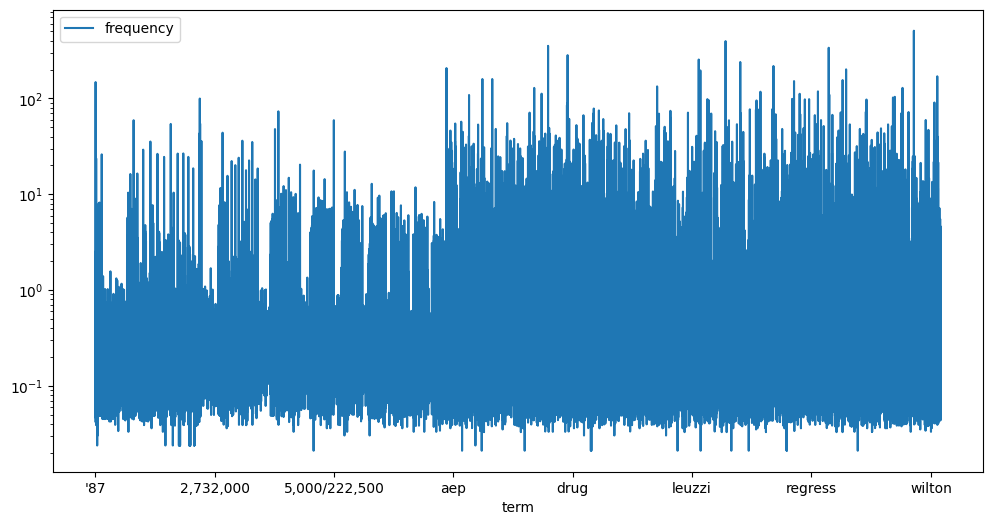

In [18]:
# compute the frequency of the each terms in the collection
term_frequencies = np.array(dtm_tfidf_sklearn.sum(axis=0)).flatten()

# Sort term frequencies in descending order
sorted_term_indices = np.argsort(term_frequencies)[::]
# Note: The np.argsort() function returns the indices that would sort an array,

terms = tfvectorizer.get_feature_names_out()
ranked_term_asc = [terms[i] for i in sorted_term_indices]
print(f"Term frequencies: {ranked_term_asc[:10]}")

# Plot frequency vs. rank
df = pd.DataFrame({'term': terms, 'frequency': term_frequencies})
# Customize X-axis labels (display vertically)
# plt.xticks(df['term'][:20], rotation=90, verticalalignment="center", fontsize=8)
ax = df.plot(x='term', y='frequency', logy=True, figsize=(12, 6))

In [19]:
# Perform LSA using TruncatedSVD:
from sklearn.decomposition import TruncatedSVD

# Specify the number of components (topics) for LSA
num_components = 90

lsa = TruncatedSVD(n_components=num_components)
lsa_result = lsa.fit_transform(dtm_tfidf_sklearn)

#Cluster the terms and documents using your favorite clustering methods.
# You can use methods like K-means, hierarchical clustering,
# or any other clustering algorithm of your choic
from sklearn.cluster import KMeans

# Specify the number of clusters for term clustering
num_term_clusters = 90

kmeans = KMeans(n_clusters=num_term_clusters)
term_clusters = kmeans.fit_predict(lsa_result)


# Explore the clusters
def get_top_terms_per_cluster(lsa_result, term_clusters, terms, num_top_terms=10):
    top_terms_per_cluster = []
    top_terms_to_cluster = [] # store the corresponding cluster id for each term

    for cluster_id in range(num_term_clusters):
        cluster_indices = np.where(term_clusters == cluster_id)[0]
        cluster_term_weights = lsa_result[cluster_indices]  # Get the term weights for the cluster
        cluster_term_weights_sum = cluster_term_weights.sum(axis=0)  # Sum term weights along cluster samples

        # Find the indices of the top terms based on their weights
        top_term_indices = np.argsort(cluster_term_weights_sum)[::-1][:num_top_terms]
        top_cluster_terms = [terms[i] for i in top_term_indices]
        top_terms_per_cluster.append(top_cluster_terms)

        # Populate top_terms_to_cluster with cluster IDs for each term
        for term_index in top_term_indices:
            top_terms_to_cluster.append(cluster_id)


    return top_terms_per_cluster, top_terms_to_cluster

# Get the top terms in each cluster
top_terms_per_cluster, top_terms_to_cluster = get_top_terms_per_cluster(lsa_result, term_clusters, terms)
print(top_terms_per_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[["'at", "'87", "'growth", "'give", "'event", "'bankrupt", '+2.8', '+12.8', "'re", '-0.6'], ["'at", "'87", "'87/88", '-daimler-puch', "'d", '-base', '+2.4', '.000', '-radiat', '-6.3'], ["'87/88", "'sourc", "'growth", "'liber", "'87", '--', '-10.0', '-agenc', '-grower', '.....'], ["'87", "'event", "'old", "'liber", "'n", "'protection", "'ll", "'the", "'give", '+bahia'], ["'87", "'bankrupt", "'d", '+13.7', '-7.1', "'ve", ',100', '+12.5', '-0.90', "'m"], ["'87", "'take", "'no", "'sourc", "'d", '+10.1', "'sugarcan", "'protection", "'s", "'we"], ["'87/88", "'ve", '-aci', '-0.90', "'re", '+13.5', '......', "'87", "'n", "'ll"], ["'87", '+bahia', "'87/88", '+2.8', '+13.5', "'liber", '--', "'n", "'old", "'bankrupt"], ["'87", "'bankrupt", "'m", "'old", "'give", "'sourc", "'full", '-10.0', ',100', "'s"], ["'87", "'event", "'give", "'m", "'growth", "'sugarcan", "'full", "'d", "'target", "'re"], ["'we", '+1.8', '+13.5', "'87/88", '+12.5', "'s", "'d", "'liber", '+2.4', "'ll"], ["'87/88", "'d", "'87"

## 7. Word embedding (if you have time)

One of the most famous machine learning model is Word2Vec. Its aim is to
compute a low-dimensional representation of the words of a corpus.
- Install gensim
- Import Word2vec: from gensim.models import Word2Vec
- Compute the embedding of the words of the corpus in dimension 16.
- Get vector of word ’computer’: vector = model.wv[’computer’]
- Find similar words with sims = model.wv.mostsimilar(′computer′, topn =
10)
- For the most frequent term, compare the set of similar words given by
word2vec to the set of words which belonged to its cluster (computed in
the previous section).

In [20]:
# 1) Import Word2vec: from gensim.models import Word2Vec
from gensim.models import Word2Vec

corpus = [doc.split() for doc in train_doc]
# 2) Compute the embedding of the words of the corpus in dimension 16.
model = Word2Vec(corpus, vector_size=16, window=5, min_count=1, sg=0)

In [21]:
# 3) Get vector of word ’computer’: vector = model.wv[’computer’]
vector = model.wv['computer']

In [22]:
# 4) Find similar words with sims = model.wv.mostsimilar(′computer′, topn = 10)
similar_words = model.wv.most_similar('computer', topn=10)
print(similar_words)

[('grenfel', 0.9631187915802002), ('b.', 0.9623734354972839), ('bloedel', 0.9596046209335327), ('chain', 0.9560831189155579), ('gordon', 0.9546690583229065), ('colorado', 0.9544810652732849), ('philip', 0.953162431716919), ('calif.', 0.9515143036842346), ('societ', 0.9507642984390259), ('district', 0.9501409530639648)]


In [23]:
# 5) For the most frequent term, compare the set of similar words given by word2vec
# to the set of words which belonged to its cluster
# (computed in the previous section).

# 1. Identify the most frequent term
for top_term_cluster in top_terms_per_cluster:
  most_frequent_term = top_term_cluster[0]

  # 2. Find the cluster to which the most frequent term belongs
  cluster_of_most_frequent_term = np.where(np.array(top_terms_per_cluster) == most_frequent_term)[0][0]

  # 3. Retrieve the set of similar words using Word2Vec for the most frequent term (assuming you have a Word2Vec model)
  # You should replace 'your_word2vec_model' with the actual Word2Vec model you have.
  similar_words_word2vec = model.wv.most_similar(most_frequent_term, topn=50)

  # 4. Compare the Word2Vec similar words to the words in the cluster
  similar_words_word2vec = set([word for word, similarity in similar_words_word2vec])
  words_in_cluster = set(top_terms_per_cluster[cluster_of_most_frequent_term])

  # Compare the two sets
  intersection = similar_words_word2vec.intersection(words_in_cluster)
  print(f"Most frequent term: {most_frequent_term}")
  print(f"Similar words from Word2Vec: {similar_words_word2vec}")
  print(f"Words in the cluster of the most frequent term: {words_in_cluster}")
  print(f"Intersection between Word2Vec similar words and cluster words: {intersection}")

Most frequent term: 'at
Similar words from Word2Vec: {"friday'", '320,057', 'calmar', 'subject', 'usm', '8,866', 'offer', 'spillman', 'addit', '3,166,000', 'usair', 'pl-480', '19,488,587', 'neglig', '172.8', '319,588', 'takeov', '9,163,141', '0.55', 'authroiz', 'bid', '1,788,406', 'suc', 'prepay', 'ri', 'bwa', 'peugeot', 'previous', 'messidor', 'issuabl', 'alternaitcv', 'all-cash', '14.25', 'pathogen', 'unitel', 'solicit', 'twa', 'gencorp', 'crr', 'alf', 'gesamtmetal', 'receiv', '630', 'kiatpaiboon', 'forthcom', 'partially-ori', 'right', 'c.o.m.b.', 'consumm', 'entangl'}
Words in the cluster of the most frequent term: {'-0.6', "'at", "'bankrupt", "'give", '+12.8', "'87", "'growth", "'re", "'event", '+2.8'}
Intersection between Word2Vec similar words and cluster words: set()
Most frequent term: 'at
Similar words from Word2Vec: {"friday'", '320,057', 'calmar', 'subject', 'usm', '8,866', 'offer', 'spillman', 'addit', '3,166,000', 'usair', 'pl-480', '19,488,587', 'neglig', '172.8', '319,58